** 5.4. Milestone 4: Semantic Segmentation**

1. importing the dataset

In [ ]:
!wget http://images.cocodataset.org/zips/train2014.zip
!unzip -q train2014.zip
!wget http://images.cocodataset.org/zips/val2014.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip -q val2014.zip
!unzip -q annotations_trainval2014.zip


! pip install 2to3
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi
!2to3 . -w
%cd PythonAPI
!python3 setup.py install


--2022-12-06 22:17:41--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.8.125, 52.216.244.164, 54.231.233.57, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.8.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  69.8MB/s    in 2m 59s  

2022-12-06 22:20:40 (72.0 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]

--2022-12-06 22:22:50--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.138.89, 52.217.169.201, 52.217.229.201, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.138.89|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.

In [ ]:

%cd /content/

/content


2. importing the required library files

In [ ]:
# Importing Data From COCO

from pycocotools import coco, cocoeval, _mask
from pycocotools import mask as maskUtils 
import array
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
%matplotlib inline


3. spliting the training and validating dataset in the dataset

In [ ]:
CATEGORY_NAMES=['person']

ANNOTATION_FILE_VAL = '/content/annotations/instances_val2014.json'
ANNOTATION_FILE_TRAIN = '/content/annotations/instances_train2014.json'


coco_train = coco.COCO(ANNOTATION_FILE_TRAIN)
catIds_train = coco_train.getCatIds(catNms=CATEGORY_NAMES);
imgIds_train = coco_train.getImgIds(catIds=catIds_train);
imgDict_train = coco_train.loadImgs(imgIds_train)
len(imgIds_train) , len(catIds_train)





coco_val = coco.COCO(ANNOTATION_FILE_VAL)
catIds_val = coco_val.getCatIds(catNms=CATEGORY_NAMES);
imgIds_val = coco_val.getImgIds(catIds=catIds_val);
imgDict_val = coco_val.loadImgs(imgIds_val)
len(imgIds_val) , len(catIds_val)

loading annotations into memory...
Done (t=15.12s)
creating index...
index created!
loading annotations into memory...
Done (t=5.86s)
creating index...
index created!


(21634, 1)

In [ ]:
from random import shuffle


shuffle(imgIds_train)
shuffle(imgIds_val)

imgIds_train = imgIds_train[0:6000]
imgIds_val = imgIds_val[0:600]


In [ ]:
train_images_person = ["COCO_train2014_{0:012d}.jpg".format(ids) for ids in imgIds_train]
val_images_person = ["COCO_val2014_{0:012d}.jpg".format(ids) for ids in imgIds_val]

In [ ]:
print(len(train_images_person) , len(val_images_person))

6000 600


In [ ]:
train_images_person = ["COCO_train2014_{0:012d}.jpg".format(ids) for ids in imgIds_train]
print(train_images_person)
del_img_train = set(os.listdir("/content/train2014")) - set(train_images_person)
for file_name in del_img_train:
  file_name = "/content/train2014/" + file_name
  if os.path.exists(file_name):
    os.remove(file_name)



['COCO_train2014_000000121226.jpg', 'COCO_train2014_000000134037.jpg', 'COCO_train2014_000000113598.jpg', 'COCO_train2014_000000385934.jpg', 'COCO_train2014_000000262991.jpg', 'COCO_train2014_000000085254.jpg', 'COCO_train2014_000000554373.jpg', 'COCO_train2014_000000492547.jpg', 'COCO_train2014_000000023703.jpg', 'COCO_train2014_000000494628.jpg', 'COCO_train2014_000000156204.jpg', 'COCO_train2014_000000324943.jpg', 'COCO_train2014_000000083787.jpg', 'COCO_train2014_000000083190.jpg', 'COCO_train2014_000000442997.jpg', 'COCO_train2014_000000514346.jpg', 'COCO_train2014_000000020644.jpg', 'COCO_train2014_000000313306.jpg', 'COCO_train2014_000000414350.jpg', 'COCO_train2014_000000359308.jpg', 'COCO_train2014_000000335758.jpg', 'COCO_train2014_000000467411.jpg', 'COCO_train2014_000000347655.jpg', 'COCO_train2014_000000449778.jpg', 'COCO_train2014_000000059874.jpg', 'COCO_train2014_000000322662.jpg', 'COCO_train2014_000000078509.jpg', 'COCO_train2014_000000318995.jpg', 'COCO_train2014_000

In [ ]:
print(len(os.listdir("/content/train2014")))

6000


In [ ]:
val_images_person = ["COCO_val2014_{0:012d}.jpg".format(ids) for ids in imgIds_val]
print(val_images_person)
del_img_val = set(os.listdir("/content/val2014")) - set(val_images_person)
for file_name in del_img_val:
  file_name = "/content/val2014/" + file_name
  if os.path.exists(file_name):
    os.remove(file_name)

len(os.listdir("/content/val2014"))

['COCO_val2014_000000417430.jpg', 'COCO_val2014_000000057377.jpg', 'COCO_val2014_000000211425.jpg', 'COCO_val2014_000000549361.jpg', 'COCO_val2014_000000378284.jpg', 'COCO_val2014_000000204853.jpg', 'COCO_val2014_000000275488.jpg', 'COCO_val2014_000000150599.jpg', 'COCO_val2014_000000187045.jpg', 'COCO_val2014_000000196053.jpg', 'COCO_val2014_000000568765.jpg', 'COCO_val2014_000000331642.jpg', 'COCO_val2014_000000070528.jpg', 'COCO_val2014_000000296222.jpg', 'COCO_val2014_000000289392.jpg', 'COCO_val2014_000000003934.jpg', 'COCO_val2014_000000035705.jpg', 'COCO_val2014_000000369812.jpg', 'COCO_val2014_000000550514.jpg', 'COCO_val2014_000000075673.jpg', 'COCO_val2014_000000113890.jpg', 'COCO_val2014_000000526576.jpg', 'COCO_val2014_000000519329.jpg', 'COCO_val2014_000000065288.jpg', 'COCO_val2014_000000319726.jpg', 'COCO_val2014_000000516875.jpg', 'COCO_val2014_000000077473.jpg', 'COCO_val2014_000000054277.jpg', 'COCO_val2014_000000247714.jpg', 'COCO_val2014_000000310445.jpg', 'COCO_val

600

In [ ]:
from PIL import Image


In [ ]:
!mkdir mask_train_2014

In [ ]:
count = 0 

for ID in imgIds_train:

  file_path = "/content/mask_train_2014/COCO_train2014_{0:012d}.jpg".format(ID)
  
  sampleImgIds = coco_train.getImgIds(imgIds = [ID])
  sampleImgDict = coco_train.loadImgs(sampleImgIds[np.random.randint(0,len(sampleImgIds))])[0]

  annIds = coco_train.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_train, iscrowd=0)
  anns = coco_train.loadAnns(annIds)


  mask = coco_train.annToMask(anns[0])
  for i in range(len(anns)):
      mask = mask | coco_train.annToMask(anns[i])
  
  mask = Image.fromarray(mask * 255 , mode = "L")
  mask.save(file_path)
  count = count + 1
  print(count)

Streaming output truncated to the last 5000 lines.
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190

In [ ]:
!rm -rf annotations/
!rm -rf train2014.zip
!rm -rf val2014.zip
!rm -rf annotations_trainval2014.zip

In [ ]:
import os
import sys
import random

import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *


seed = 2019

random.seed = seed
np.random.seed = seed 

In [ ]:
class DataGen(tf.keras.utils.Sequence):
  
  def __init__(self , path_input , path_mask , batch_size = 8 , image_size = 128):
    
    self.ids = os.listdir(path_input)
    self.path_input = path_input
    self.path_mask = path_mask
    self.batch_size = batch_size
    self.image_size = image_size
    self.on_epoch_end()
  
  def __load__(self , id_name):
    
    image_path = os.path.join(self.path_input , id_name)
    mask_path = os.path.join(self.path_mask , id_name) 
    
    image = cv2.imread(image_path , 1) # 1 specifies RGB format
    image = cv2.resize(image , (self.image_size , self.image_size)) # resizing before inserting to the network
    
    mask = cv2.imread(mask_path , -1)
    mask = cv2.resize(mask , (self.image_size , self.image_size))
    mask = mask.reshape((self.image_size , self.image_size , 1))
      
    #normalize image
    image = image / 255.0
    mask = mask / 255.0
    
    return image , mask
  
  def __getitem__(self , index):
    
    if (index + 1)*self.batch_size > len(self.ids):
      self.batch_size = len(self.ids) - index * self.batch_size
        
    file_batch = self.ids[index * self.batch_size : (index + 1) * self.batch_size]
    
    images = []
    masks = []
    
    for id_name in file_batch : 
      
      _img , _mask = self.__load__(id_name)
      images.append(_img)
      masks.append(_mask)
    
    
    images = np.array(images)
    masks = np.array(masks)
    
    
    return images , masks
  
  
  def on_epoch_end(self):
    pass
  
  
  def __len__(self):
    
    return int(np.ceil(len(self.ids) / float(self.batch_size)))

In [ ]:
def down_block(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal",
    max_pool_window=(2, 2),
    max_pool_stride=(2, 2)
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    # conv for skip connection
    conv = Activation("relu")(conv)

    pool = MaxPooling2D(pool_size=max_pool_window, strides=max_pool_stride)(conv)

    return conv, pool

In [ ]:
def bottle_neck(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal"
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    return conv

In [ ]:
def up_block(    
    input_tensor,
    no_filters,
    skip_connection, 
    kernel_size=(3, 3),
    strides=(1, 1),
    upsampling_factor = (2,2),
    max_pool_window = (2,2),
    padding="same",
    kernel_initializer="he_normal"):
    
    
    conv = Conv2D(
        filters = no_filters,
        kernel_size= max_pool_window,
        strides = strides,
        activation = None,
        padding = padding,
        kernel_initializer=kernel_initializer
    )(UpSampling2D(size = upsampling_factor)(input_tensor))
    
    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv) 
    
    
    conv = concatenate( [skip_connection , conv]  , axis = -1)
    
    
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)
    
    return conv



In [ ]:
def output_block(input_tensor,
    padding="same",
    kernel_initializer="he_normal"
):
    
    conv = Conv2D(
        filters=2,
        kernel_size=(3,3),
        strides=(1,1),
        activation="relu",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)
    
    
    conv = Conv2D(
        filters=1,
        kernel_size=(1,1),
        strides=(1,1),
        activation="sigmoid",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)
    
    
    return conv
    

UNET MODEL

In [ ]:
def UNet(input_shape = (128,128,3)):
    
    filter_size = [64,128,256,512,1024]
    
    inputs = Input(shape = input_shape)
    
    d1 , p1 = down_block(input_tensor= inputs,
                         no_filters=filter_size[0],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    d2 , p2 = down_block(input_tensor= p1,
                         no_filters=filter_size[1],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    
    d3 , p3 = down_block(input_tensor= p2,
                         no_filters=filter_size[2],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    
    d4 , p4 = down_block(input_tensor= p3,
                         no_filters=filter_size[3],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    b = bottle_neck(input_tensor= p4,
                         no_filters=filter_size[4],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal")
    
    
    
    u4 = up_block(input_tensor = b,
                  no_filters = filter_size[3],
                  skip_connection = d4,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    u3 = up_block(input_tensor = u4,
                  no_filters = filter_size[2],
                  skip_connection = d3,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    
    u2 = up_block(input_tensor = u3,
                  no_filters = filter_size[1],
                  skip_connection = d2,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    
    u1 = up_block(input_tensor = u2,
                  no_filters = filter_size[0],
                  skip_connection = d1,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    
    
    output = output_block(input_tensor=u1 , 
                         padding = "same",
                         kernel_initializer= "he_normal")
    
    model = Model(inputs = inputs , outputs = output)
    
    
    return model
    

In [ ]:
model = UNet(input_shape = (128,128,3))
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
image_size = 128 
epochs = 1
batch_size = 8


In [ ]:
train_gen = DataGen(path_input = "/content/train2014" , path_mask = "/content/mask_train_2014/" , batch_size = batch_size , image_size = image_size)
val_gen = DataGen(path_input =  "/content/val2014", path_mask =  "/content/mask_val_2014", batch_size = batch_size , image_size = image_size)


train_steps =  len(os.listdir( "/content/train2014"))/batch_size


model.fit_generator(train_gen , validation_data = val_gen , steps_per_epoch = train_steps , epochs=epochs)

<ipython-input-27-309d4a120fbd>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_gen , validation_data = val_gen , steps_per_epoch = train_steps , epochs=epochs)


546/750 [====================>.........] - ETA: 55:56 - loss: 0.3621 - accuracy: 0.8184

Text(0.5, 1.0, 'masked image')

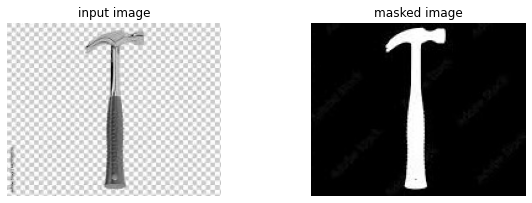

In [31]:
import cv2
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
Image1 = cv2.imread('/content/drive/MyDrive/imagesof hammer1.jpeg')
Image2 = cv2.imread('/content/drive/MyDrive/imagesof hammer2.jpeg')
fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.axis('off')
plt.title("input image")
fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title("masked image")